/Users/tang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=784, units=128)`
/Users/tang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=10)`


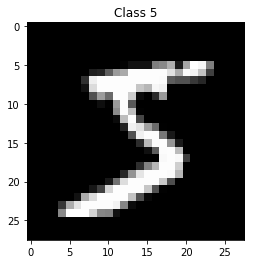

In [6]:
from matplotlib import pyplot as plt
% matplotlib inline

import numpy as np

np.random.seed(13)

from keras import backend as K
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Activation, Flatten, Dropout, Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.layers.normalization import BatchNormalization
import os
from keras.utils import plot_model
from keras.callbacks import EarlyStopping

num_classes = 10
input_unit_size = 28 * 28
np_epochs = 20

# 普通全连接 model
# dense
#   |
#   V
#  relu
#   |
#   V
#  dense
#   |
#   V
#  softmax
denseModel = Sequential()
denseModel.add(Dense(output_dim=128, input_dim=input_unit_size))
denseModel.add(Activation("relu"))
# model.add(Conv2D())
denseModel.add(Dense(output_dim=num_classes))
denseModel.add(Activation("softmax"))
denseModel.compile(loss='categorical_crossentropy',
                   optimizer='adam',
                   metrics=['accuracy'])

currentPath = os.path.abspath('.')
(x_train, y_train), (x_test, y_test) = mnist.load_data(currentPath + "/../data/mnist.npz")


plt.imshow(x_train[0], cmap='gray')
plt.title('Class ' + str(y_train[0]))


##归一化数据
x_train = x_train.reshape(x_train.shape[0], input_unit_size)
x_test = x_test.reshape(x_test.shape[0], input_unit_size)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_5 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
_________________________________________________________________
activation_6 (Activation)    (None, 10)                0         
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


/Users/tang/anaconda3/lib/python3.6/site-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 51000 samples, validate on 9000 samples
Epoch 1/20
 - 2s - loss: 0.3170 - acc: 0.9127 - val_loss: 0.1695 - val_acc: 0.9513
Epoch 2/20
 - 2s - loss: 0.1454 - acc: 0.9588 - val_loss: 0.1156 - val_acc: 0.9670
Epoch 3/20
 - 2s - loss: 0.1007 - acc: 0.9712 - val_loss: 0.1093 - val_acc: 0.9680
Epoch 4/20
 - 2s - loss: 0.0765 - acc: 0.9783 - val_loss: 0.0891 - val_acc: 0.9747
Epoch 5/20
 - 2s - loss: 0.0596 - acc: 0.9824 - val_loss: 0.0788 - val_acc: 0.9772
Epoch 6/20
 - 2s - loss: 0.0478 - acc: 0.9858 - val_loss: 0.0866 - val_acc: 0.9742
Epoch 00006: early stopping
10000/10000 [==============================] - 0s 15us/step
eval accuracy is :0.9741


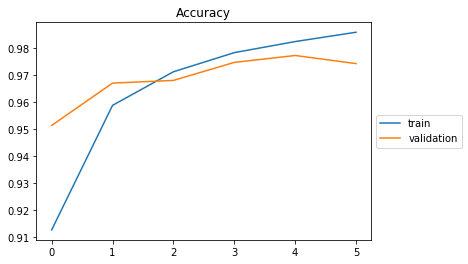

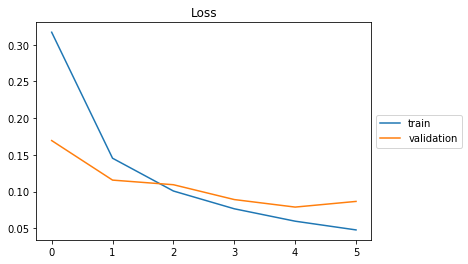

In [7]:
# one-hot representation
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

# 打印模型结构
denseModel.summary()

denseResult = denseModel.fit(x_train, y_train,
                             epochs=np_epochs, batch_size=64,
                             verbose=2, validation_split=0.15,
                             callbacks=[
                                 EarlyStopping(monitor='val_loss',
                                               patience=1, verbose=2,
                                               mode='auto')])
eval = denseModel.evaluate(x_test, y_test, batch_size=64)
print("eval accuracy is :"+str(eval[1]))
print("eval accuracy is :"+str(eval[1]))

plot_model(denseModel, "../data/denseModel.png")
### dense model graph
x = range(len(denseResult.epoch))
plt.plot(x, denseResult.history['acc'], label='train')
plt.plot(x, denseResult.history['val_acc'], label='validation')
plt.title('Accuracy')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.plot(x, denseResult.history['loss'], label='train')
plt.plot(x, denseResult.history['val_loss'], label='validation')
plt.title('Loss')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 27, 27, 128)       640       
_________________________________________________________________
activation_12 (Activation)   (None, 27, 27, 128)       0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 256)       131328    
_________________________________________________________________
activation_13 (Activation)   (None, 12, 12, 256)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 512)       524800    
_________________________________________________________________
activation_14 (Activation)   (None, 11, 11, 512)       0         
__________

/Users/tang/anaconda3/lib/python3.6/site-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 48000 samples, validate on 12000 samples
Epoch 1/20
 - 474s - loss: 0.1248 - acc: 0.9607 - val_loss: 0.0525 - val_acc: 0.9842
Epoch 2/20
 - 463s - loss: 0.0413 - acc: 0.9875 - val_loss: 0.0461 - val_acc: 0.9871
Epoch 3/20
 - 548s - loss: 0.0285 - acc: 0.9906 - val_loss: 0.0401 - val_acc: 0.9893
Epoch 4/20
 - 512s - loss: 0.0218 - acc: 0.9933 - val_loss: 0.0461 - val_acc: 0.9887
Epoch 5/20
 - 446s - loss: 0.0165 - acc: 0.9951 - val_loss: 0.0377 - val_acc: 0.9909
Epoch 6/20
 - 442s - loss: 0.0134 - acc: 0.9955 - val_loss: 0.0743 - val_acc: 0.9838
Epoch 7/20
 - 376s - loss: 0.0126 - acc: 0.9963 - val_loss: 0.0837 - val_acc: 0.9839
Epoch 8/20
 - 422s - loss: 0.0115 - acc: 0.9967 - val_loss: 0.0504 - val_acc: 0.9894
Epoch 9/20
 - 489s - loss: 0.0100 - acc: 0.9969 - val_loss: 0.0469 - val_acc: 0.9898
Epoch 10/20
 - 498s - loss: 0.0063 - acc: 0.9981 - val_loss: 0.0587 - val_acc: 0.9892
Epoch 11/20
 - 527s - loss: 0.0100 - acc: 0.9970 - val_loss: 0.0917 - val_acc: 0.9856
Epoch 12/20
 

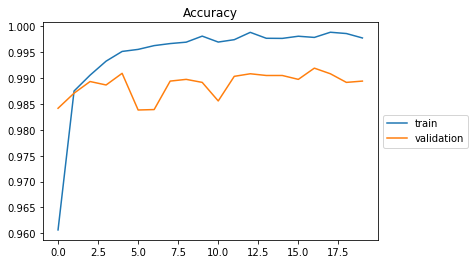

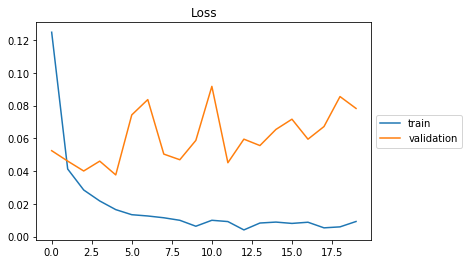

In [10]:
(x_train, y_train), (x_test, y_test) = mnist.load_data(currentPath + "/../data/mnist.npz")

##归一化数据
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# one-hot representation
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)
#### cnn model 
# 28*28*1->28*28*64->14*14*64->7*7*256--->512-->dropOut->10
# conv2D
#   |
#   V
#  pool
#   |
#   V
#  relu
#   |
#   V
#  Dense
#   |
#   V
#  softMax
cnnModel = Sequential()
cnnModel.add(Conv2D(128, (2, 2), input_shape=(28, 28, 1)))
cnnModel.add(Activation("relu"))
cnnModel.add(MaxPooling2D(pool_size=(2, 2)))

BatchNormalization(axis=-1)
cnnModel.add(Conv2D(256, (2, 2)))
cnnModel.add(Activation('relu'))
BatchNormalization(axis=-1)
cnnModel.add(Conv2D(512, (2, 2)))
cnnModel.add(Activation('relu'))
cnnModel.add(MaxPooling2D(pool_size=(2, 2)))

# fully layer
cnnModel.add(Flatten())

cnnModel.add(Dense(512))
# cnnModel.add(Dropout(0.1))
cnnModel.add(Activation('relu'))
BatchNormalization()
cnnModel.add(Dense(num_classes))
cnnModel.add(Activation("softmax"))
cnnModel.compile(loss='categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

# 打印模型结构
cnnModel.summary()

cnnResult = cnnModel.fit(x_train, y_train,
                         epochs=np_epochs, batch_size=64,
                         verbose=2, validation_split=0.2)

plot_model(cnnModel, "../data/cnnModel.png")

eval = cnnModel.evaluate(x_test, y_test, batch_size=64)
print("eval accuracy is  :" + str(eval[1]))

### cnn model graph

x = range(len(cnnResult.epoch))
plt.plot(x, cnnResult.history['acc'], label='train')
plt.plot(x, cnnResult.history['val_acc'], label='validation')
plt.title('Accuracy')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.plot(x, cnnResult.history['loss'], label='train')
plt.plot(x, cnnResult.history['val_loss'], label='validation')
plt.title('Loss')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
